___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
print ('Training data:', x_train.shape, y_train.shape)
print ('Test data:', x_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [5]:
x_train[5].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
y_train[0]

9

In [18]:
classes[y_train[0]]

'Ankle boot'

In [19]:
classes[int(y_train[0])]

'Ankle boot'

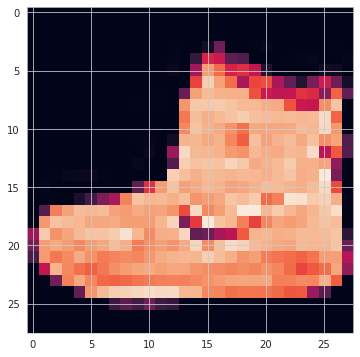

In [22]:
plt.imshow(x_train[0])

In [8]:
y_train.shape

(60000,)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [10]:

# example of loading the fashion mnist dataset
from matplotlib import pyplot

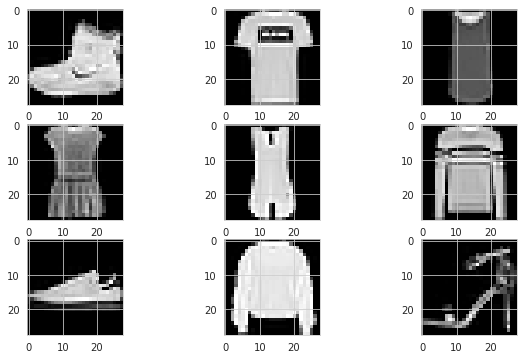

In [14]:
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

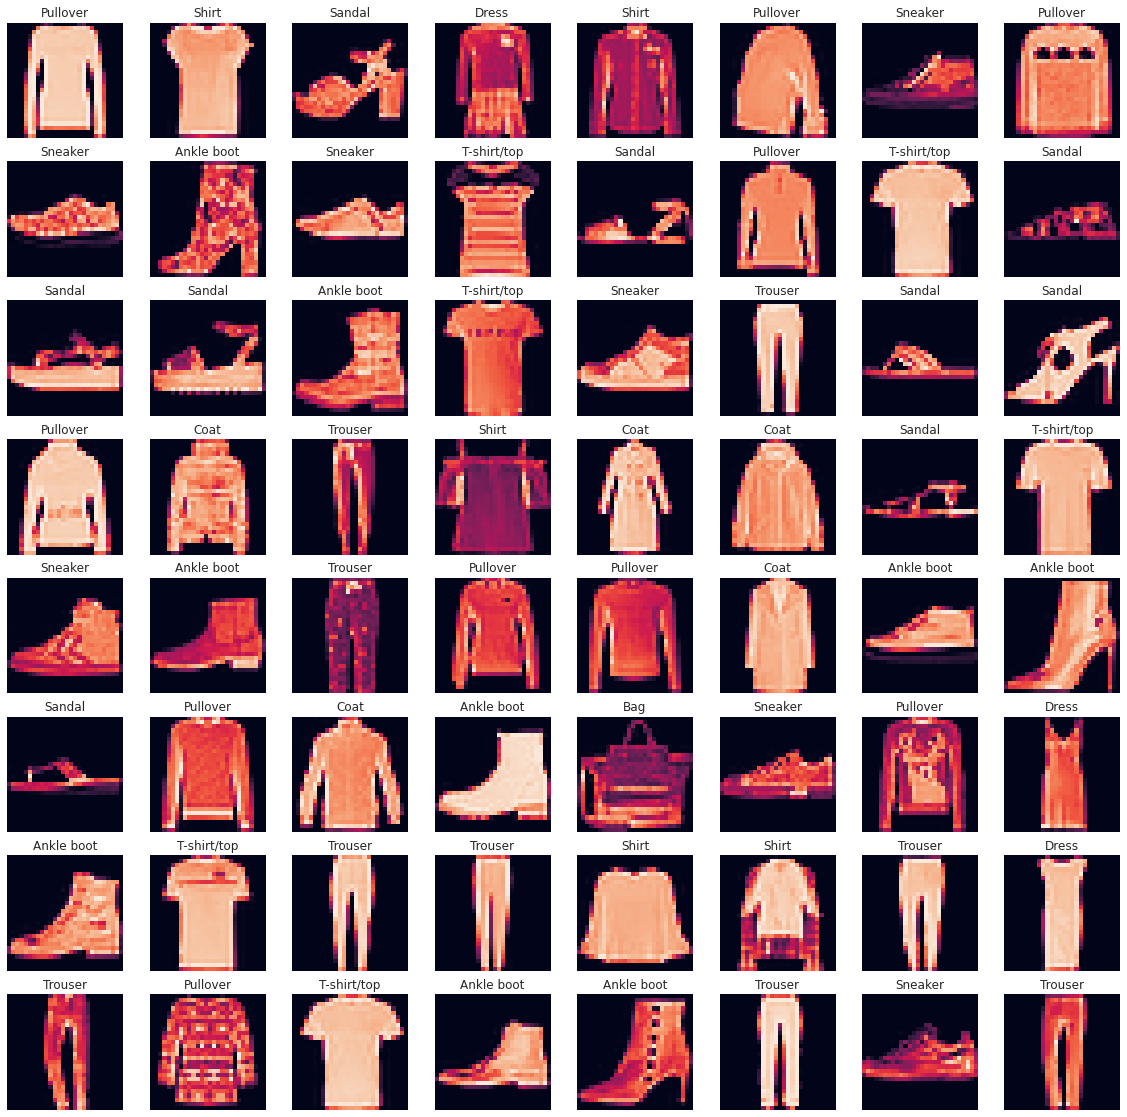

In [23]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [24]:
x_train[5].min()

0

In [25]:
x_train[5].max()

255

In [26]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [27]:
x_train[5].max()

1.0

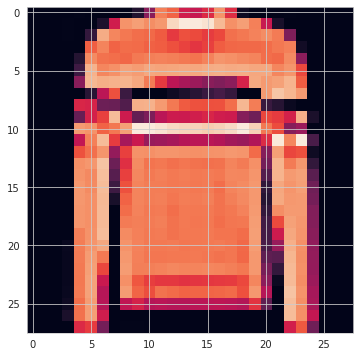

In [28]:
plt.imshow(x_train[5])

In [29]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [31]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [32]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [33]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[0]

9

In [36]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [41]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [45]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop]) 


Epoch 1/50
1875/1875 [==============================] - 43s 22ms/step - loss: 0.3893 - accuracy: 0.8618 - val_loss: 0.3159 - val_accuracy: 0.8861
Epoch 2/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2663 - accuracy: 0.9044 - val_loss: 0.2697 - val_accuracy: 0.9026
Epoch 3/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2280 - accuracy: 0.9182 - val_loss: 0.2750 - val_accuracy: 0.9037
Epoch 4/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2049 - accuracy: 0.9268 - val_loss: 0.2646 - val_accuracy: 0.9071
Epoch 5/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1869 - accuracy: 0.9334 - val_loss: 0.2632 - val_accuracy: 0.9093
Epoch 6/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1712 - accuracy: 0.9398 - val_loss: 0.2841 - val_accuracy: 0.9108
Epoch 7/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1595 - accuracy: 0.9440 - val_loss: 0.2776 -

In [46]:
X_train.shape

(60000, 28, 28, 1)

In [47]:
Y_train.shape

(60000, 10)

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.389,0.862,0.316,0.886
1,0.266,0.904,0.270,0.903
2,0.228,0.918,0.275,0.904
3,0.205,0.927,0.265,0.907
4,0.187,0.933,0.263,0.909


**TASK 7: Plot values of metrics you used in your model.**

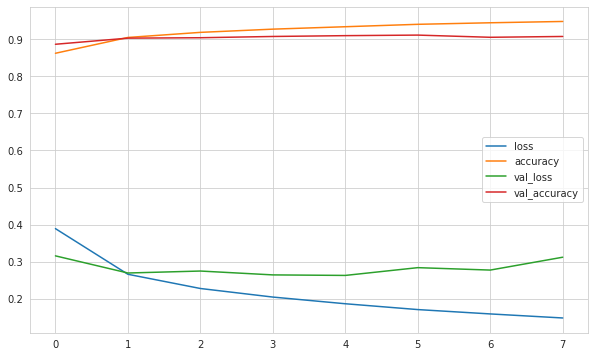

In [50]:
summary.plot();

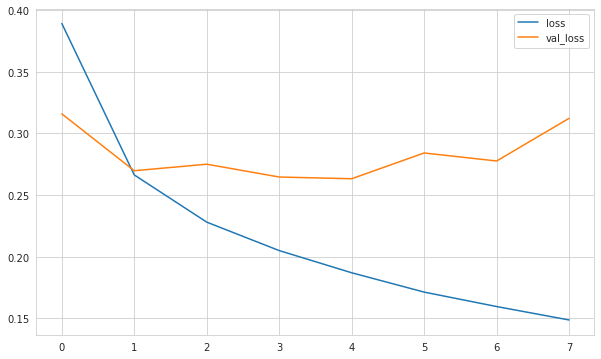

In [51]:
summary[["loss", "val_loss"]].plot();

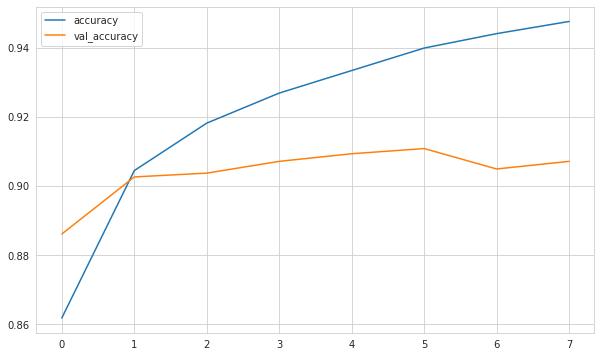

In [52]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [53]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [54]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2841 - accuracy: 0.9108


[0.28414037823677063, 0.9107999801635742]

In [55]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28414037823677063
Test accuracy: 0.9107999801635742


In [56]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 6ms/step


array([[1.64356670e-08, 3.67261777e-10, 3.84789667e-09, ...,
        2.26995733e-04, 7.72013493e-07, 9.99647975e-01],
       [1.25469768e-07, 3.74318905e-20, 9.99998033e-01, ...,
        1.94001174e-13, 1.06735604e-13, 9.14602798e-15],
       [4.24929059e-12, 9.99999940e-01, 5.29333793e-14, ...,
        1.13209037e-14, 2.89590644e-13, 1.06809002e-15],
       ...,
       [1.81823268e-08, 2.31442502e-20, 3.31073884e-11, ...,
        4.86164708e-09, 9.99999106e-01, 8.52852487e-15],
       [9.29805176e-15, 9.99999940e-01, 9.04666594e-15, ...,
        1.24131133e-13, 1.08590376e-15, 4.59643445e-13],
       [6.89544831e-05, 1.30987326e-06, 1.51613958e-05, ...,
        3.05772498e-02, 4.82219784e-03, 1.36534055e-03]], dtype=float32)

In [57]:
pred_prob.shape

(10000, 10)

In [58]:
pred_prob[0]

array([1.6435667e-08, 3.6726178e-10, 3.8478967e-09, 2.1486478e-10,
       2.3301963e-10, 1.2426969e-04, 2.8061145e-10, 2.2699573e-04,
       7.7201349e-07, 9.9964797e-01], dtype=float32)

In [60]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [61]:
y_pred.shape

(10000,)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.80      0.86      1000
           3       0.91      0.91      0.91      1000
           4       0.79      0.93      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.77      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [63]:
print(confusion_matrix(y_test, y_pred))

[[830   0  12  30   7   2 111   0   8   0]
 [  0 982   1   8   4   0   3   0   2   0]
 [ 15   0 802   8 103   0  71   0   1   0]
 [  7   5   3 911  42   0  31   0   1   0]
 [  1   0  23  17 927   0  31   0   1   0]
 [  0   0   0   1   0 978   0  12   0   9]
 [ 81   2  32  23  83   0 771   0   8   0]
 [  0   0   0   0   0  10   0 976   1  13]
 [  2   1   2   4   2   4   1   2 982   0]
 [  1   0   0   0   0   8   0  42   0 949]]


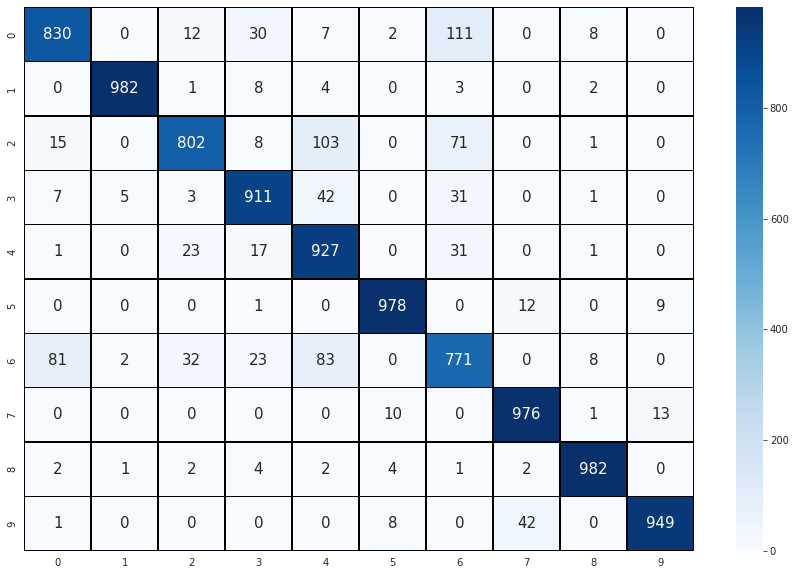

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [65]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [66]:
(y_test != y_pred).sum()

892

## Prediction

In [67]:
my_number = X_test[5]

In [68]:
my_number.shape

(28, 28, 1)

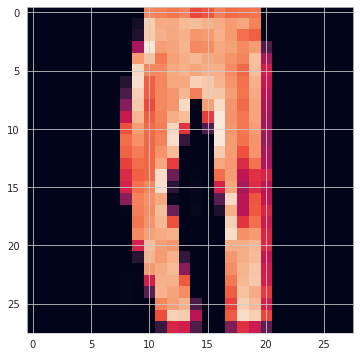

In [69]:
plt.imshow(my_number.reshape(28,28));

In [70]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 21ms/step


array([[5.6153401e-11, 1.0000000e+00, 1.8109554e-12, 1.1184277e-10,
        6.3895438e-13, 3.4720799e-13, 5.6738078e-12, 7.8169418e-15,
        2.1757218e-12, 1.6455419e-15]], dtype=float32)

In [71]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [72]:
model.save("cnn-1.h5")

In [73]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

1/1 [==============================] - 0s 35ms/step


In [74]:
np.argmax(pred)

1

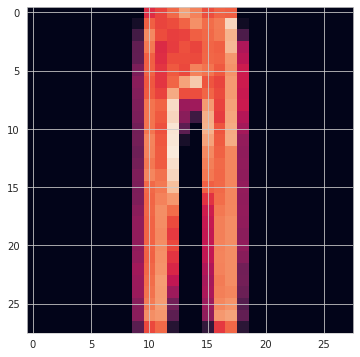

In [75]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___